In [1]:
# python包scipy在物理工程和数学的应用导论

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# 基础

## 优化

In [5]:
from scipy.optimize import minimize

求$f(x)=(x-3)^2$最小值

In [11]:
def f(x):
    return (x-3)**2
res = minimize(f,2)
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 5.551437397369767e-17
        x: [ 3.000e+00]
      nit: 2
      jac: [-4.325e-13]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3

In [39]:
#从sympy的符号之转来的函数也是可以使用lambda化成为数值计算使用的函数用于scipy的计算中
from scipy.optimize import minimize
x=smp.symbols('x',real=True)
func = (x-3)**2 
func_f=smp.lambdify([x],func) 
res = minimize(func_f,2)
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 5.551437397369767e-17
        x: [ 3.000e+00]
      nit: 2
      jac: [-4.325e-13]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3

-----------------------------------------------

在一个范围中最优化函数 $ f(x,y)=(x-1)^2+(y-2.5)^2$ 

$$x-2y+2 \geq 0 $$
$$-x-2y+6 \geq 0$$
$$-x + 2y + 2 \geq 0$$
$$x \geq 0 $$
$$y \geq 0 $$

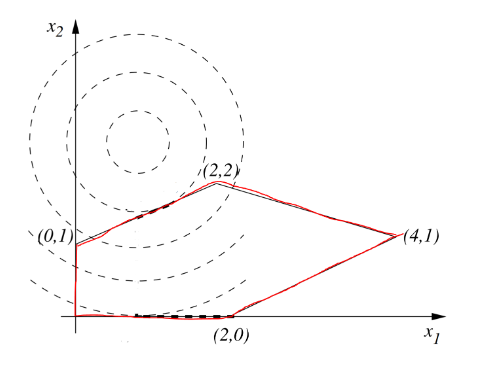

* 2D 函数接受向量 $x$
* 约束必须指定 $ g_i (x) \geq 0 $$
* 指定为矩形的边界

In [12]:
f = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2
#边界定义 ineq不等式
cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})
#None为无限
bnds = ((0, None), (0, None))
#开始优化 可给出猜测
res = minimize(f, (2, 0), bounds=bnds, constraints=cons)

In [13]:
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.8000000011920985
       x: [ 1.400e+00  1.700e+00]
     nit: 3
     jac: [ 8.000e-01 -1.600e+00]
    nfev: 10
    njev: 3

## 插值

假设你有一些实验数据，收集的数据必然是 x y 坐标比较常见；

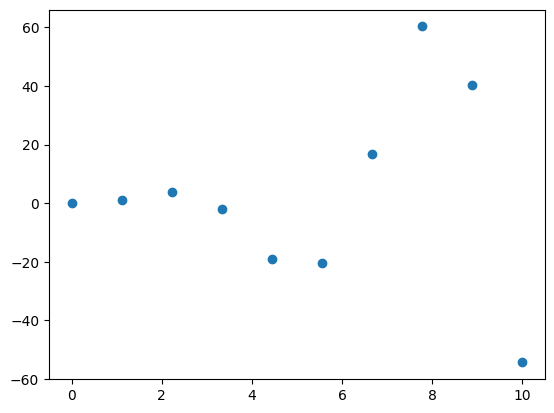

In [15]:
#准备一些数据点
x=np.linspace(0,10,10)
y=x**2*np.sin(x)
plt.scatter(x,y)

此时想知道这些点之间的某处数据，那么需要做插值，插值方法很多，如赫米特插值、拉格朗日插值、牛顿插值等

In [18]:
from scipy.interpolate import interp1d


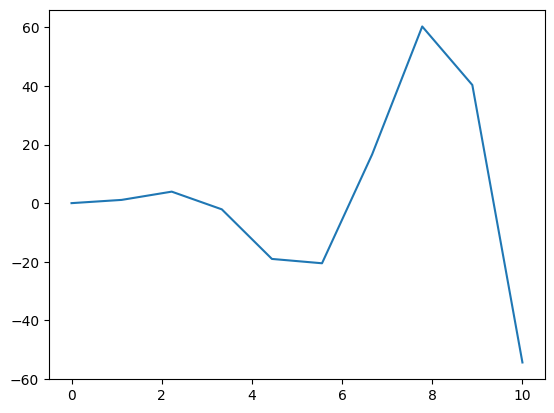

In [26]:
#只用线性插值
f=interp1d(x,y,kind='linear')
x_dense=np.linspace(0,10,100)
y_dense=f(x_dense)
plt.plot(x_dense,y_dense)

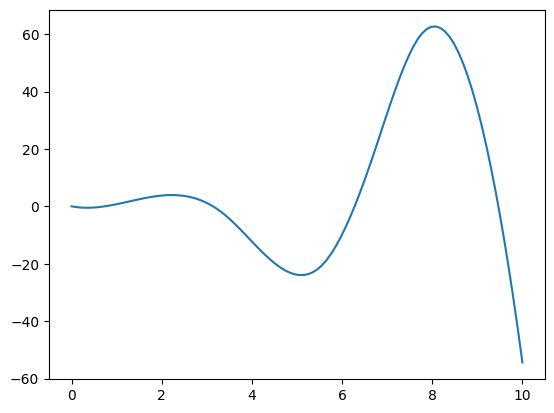

In [27]:
#使用三次曲线插值
f=interp1d(x,y,kind='cubic')
x_dense=np.linspace(0,10,100)
y_dense=f(x_dense)
plt.plot(x_dense,y_dense)

## 曲线拟合

In [28]:
x_data = np.linspace(0,10,10)
y_data = 3*x_data**2+2

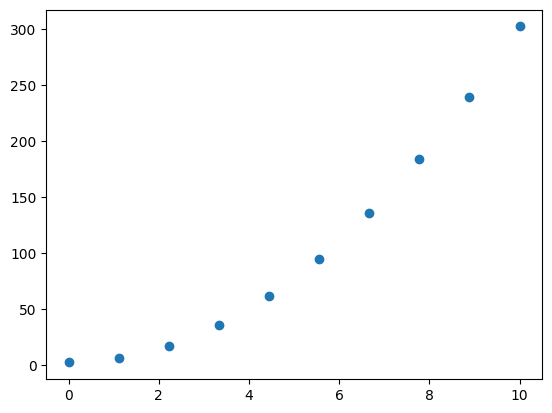

In [29]:
plt.scatter(x_data,y_data)

若我只是得到了点数据，并因此推测原函数应该是一个二次函数，那么可以把数据对着二次曲线曲线$y=ax^2+b$.主要任务就是将a b 两者求出来；

In [31]:
from scipy.optimize import curve_fit

def func(x,a,b):
    return a*x**2+b
#popt优化得到最佳参数     pcov协方差
popt,pcov = curve_fit(func,x_data,y_data,p0=(1,1))

In [32]:
popt

array([3., 2.])

In [33]:
pcov

array([[ 4.13297331e-34, -1.45419433e-32],
       [-1.45419433e-32,  9.65872308e-31]])

-----------------------------------\
弹簧问题，动力方程为 $ y(t)=A\cos(\omega t + \Phi) $ . 为了获得此弹簧固有的频率因子$\omega$ ，收集了一系列的数据如下

In [35]:
t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])

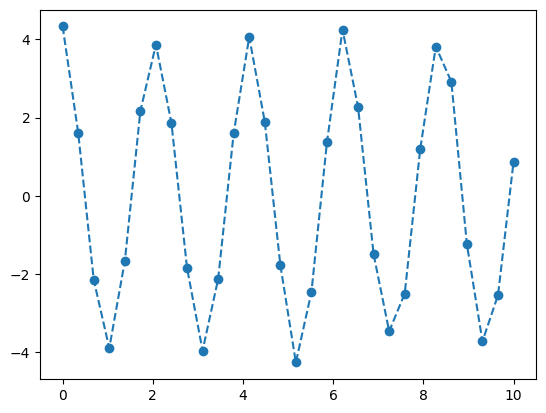

In [36]:
plt.plot(t_data,y_data,'o--')

我们知道$\omega = 2 \pi f$, $f=1/T$, and $T \approx 2$ 秒. 所以大概猜测

* $\omega = 2 \pi (1/2) = \pi$
* $A=4$
* $\phi = 0$

In [45]:
from scipy.optimize import curve_fit

def func(x, A, w, phi):
    return A*np.cos(w*x+phi)
#假设振幅4  频率周期为pi 相位偏移0  开始拟合
popt, pcov = curve_fit(func, t_data, y_data, p0=(4, np.pi, 0))
popt

array([3.94836219, 2.99899521, 0.10411352])

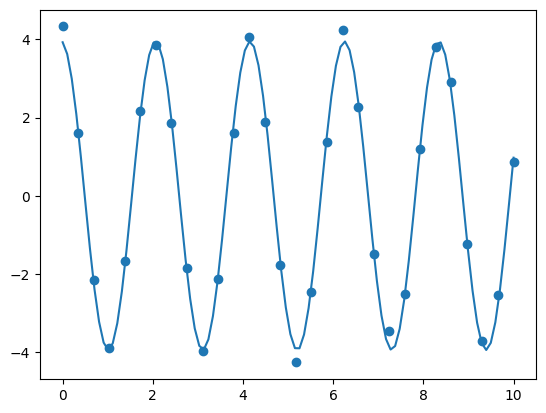

In [46]:
#对结果验证
A, w, phi=popt
t=np.linspace(0,10,100)
y=func(t,A,w,phi)
plt.scatter(t_data,y_data)
plt.plot(t,y)

In [49]:
#协方差  一般在拟合的时候这个矩阵会起作用
pcov

array([[ 2.61882717e-03, -4.94131505e-06,  3.47404558e-05],
       [-4.94131505e-06,  1.85637335e-05, -9.60755036e-05],
       [ 3.47404558e-05, -9.60755036e-05,  6.63423791e-04]])

In [54]:
# 取得协方差矩阵的对角线值开方 由此得到三个参数上的误差
np.sqrt(np.diag(pcov))

array([0.05117448, 0.00430857, 0.02575701])

注意：使用曲线拟合的时候需要非常注意猜测的数字，否则结果可能相差甚远，所以可预先使用直线插值预估走向

## 特殊方程

勒让德多项式 $P_l(x)$： 满足 $(1-x^2)y'' -2xy'+l(l+1)y = 0$

这是在解氢原子波函数时出现的一个方程，l为整数

* 球面薛定谔方程的角度分量，允许非无限解


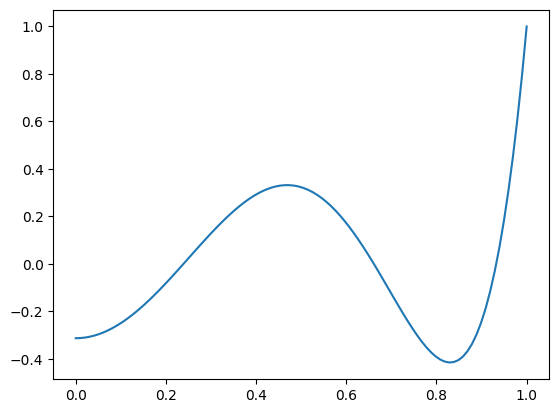

In [55]:
#直接使用包内含有的勒让德
from scipy.special import legendre
x = np.linspace(0, 1, 100)
plt.plot(x, legendre(6)(x))
plt.show()

In [59]:
legendre(6)

poly1d([ 1.44375000e+01,  0.00000000e+00, -1.96875000e+01,  1.60288449e-15,
        6.56250000e+00,  0.00000000e+00, -3.12500000e-01])

贝塞尔函数 $ J_{\alpha}(x)$：满足 $ x^2 y'' + xy' + (x^2-\alpha^2)y = 0 $

* 极坐标中的拉普拉斯方程

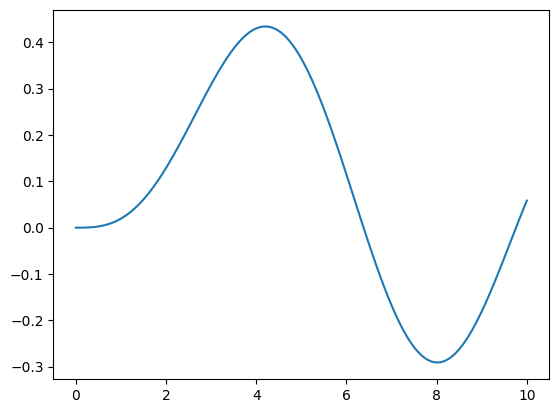

In [60]:
from scipy.special import jv
x = np.linspace(0, 10, 100)
plt.plot(x, jv(3,x))
plt.show()

## 微积分

scipy会对输入的函数进行分析，得出另外一个更加合适简易接近的方程，然后对输入点计算
\
numpy则是直接数值计算

### 微分

In [3]:
from scipy.misc import derivative

In [5]:
def f(x):
    return x**2*np.sin(2*x)*np.exp(-x)
x=np.linspace(0,1,100)

C:\Users\sky92\AppData\Local\Temp\ipykernel_10212\2266820593.py:2: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  plt.plot(x,derivative(f,x,dx=1e-2))
C:\Users\sky92\AppData\Local\Temp\ipykernel_10212\2266820593.py:3: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  plt.plot(x,derivative(f,x,dx=1e-2,n=2))


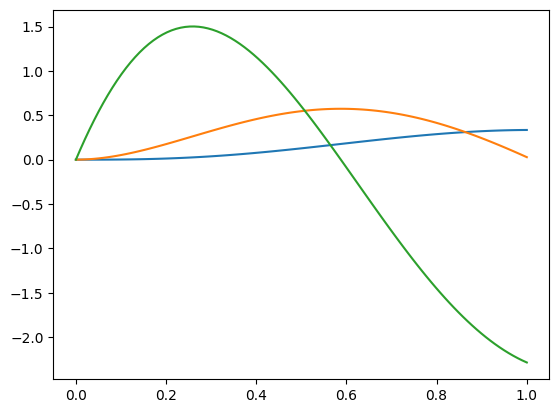

In [15]:
plt.plot(x,f(x))
plt.plot(x,derivative(f,x,dx=1e-2))
plt.plot(x,derivative(f,x,dx=1e-2,n=2))

## 积分

### 单独积分 
$$
\int_0^1 x^2 \sin(2x)e^{-x} dx
$$

In [23]:
from scipy.integrate import quad
#一旦scipy接受了该积分 则该积分式子以及上下限都会被计算进入scipy内 预处理出一个数值函数
integrand = lambda x :x**2*np.sin(2*x)*np.exp(-x)
#计算结果和误差
integral,integral_error = quad(integrand,0,1)

In [24]:
integral

0.14558175869954834

In [25]:
integral_error

1.6162822047366225e-15

### 重积分
$$ \int_{0}^{1} \int_{-x}^{x^2} \sin(x+y^2) dy dx $$

In [26]:
from scipy.integrate import dblquad
integrand = lambda y, x: np.sin(x+y**2)
lwr_y = lambda x: -x
upr_y = lambda x: x**2
integral, integral_error = dblquad(integrand, 0, 1, lwr_y, upr_y)

In [27]:
integral

0.590090324408853

In [28]:
integral_error

2.0545915475811425e-14

## 微分方程

### 一阶常微分方程

下落时的空气摩擦**一阶常微分方程**

$$ v' - \alpha v^2 + \beta = 0 \hspace{10mm} v(0) = 0$$

In [35]:
from scipy.integrate import odeint

关于微分方程的所有信息

In [36]:
def dvdt(v,t):
    return 3*v**2-5
v0=0

解微分方程

In [38]:
t=np.linspace(0,1,100)
sol = odeint(dvdt,v0,t)

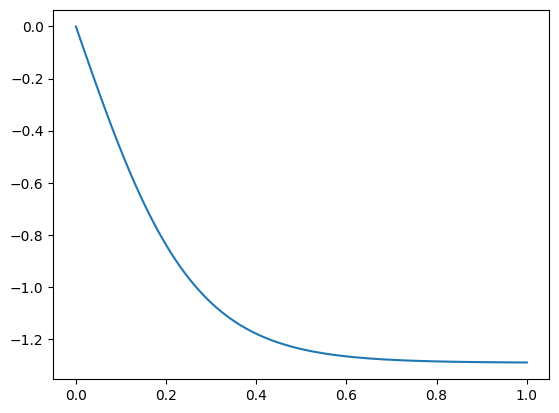

In [41]:
plt.plot(t,sol.T[0])

### 耦合一阶常微分方程

$$ y_1' = y_1 + y_2^2 + 3x \hspace{10mm} y_1(0)=0$$
$$ y_2' = 3y_1 + y_2^3 - \cos(x) \hspace{10mm} y_2(0)=0$$

建立一个 $S=(y_1, y_2)$  

我们需要编写一个返回$dS/dx = (dy_1/dx, dy_2/dx)$的函数。函数 $dS/dx$ 可以接受  $S=(y_1, y_2)$ 和 $x$ 

In [49]:
def dSdx(S, x):
    y1 = S[0]
    y2 = S[1]
    return [y1 + y2**2  + 3*x,
           3*y1 + y2**3 - np.cos(x)]
y1_0 = 0
y2_0 = 0
S_0 = (y1_0, y2_0)

In [50]:
x = np.linspace(0, 1, 100)
sol = odeint(dSdx, S_0, x)

In [56]:
y1_sol=sol.T[0]
y2_sol=sol.T[1]

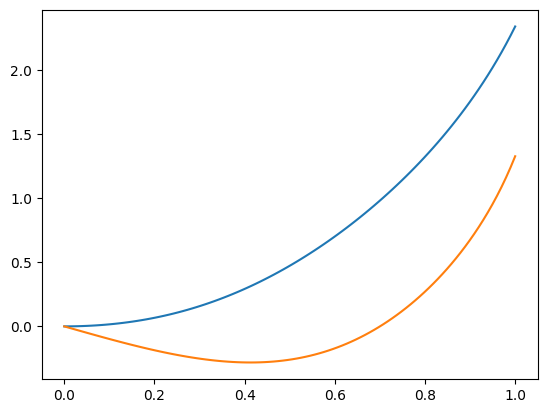

In [57]:
y1_sol = sol.T[0]
y2_sol = sol.T[1]
plt.plot(x, y1_sol)
plt.plot(x, y2_sol)

### 二阶常微分方程

一个摆锤的方程等式

$$\theta'' - \sin(\theta) = 0$$

Scipy 只能解决耦合的一阶常微分方程,但是 **任何二阶常微分方程都可以转化为耦合的两个一阶常微分方程组**. 对于更高阶的方程也是如此

定义 $\omega = d\theta/dt$ 就得到如下耦合的方程组

$$d \omega / dt = \sin(\theta)$$
$$d \theta / dt = \omega $$

设 $S = (\theta, \omega)$

In [92]:
def dSdt(S, t):
    theta,omega = S
    return [omega,
            np.sin(theta) ]
theta_0 = np.pi/4
omega_0 = 0
S_0 = (theta_0, omega_0)

In [93]:
t = np.linspace(0, 20, 100)
sol = odeint(dSdt, S_0, t)

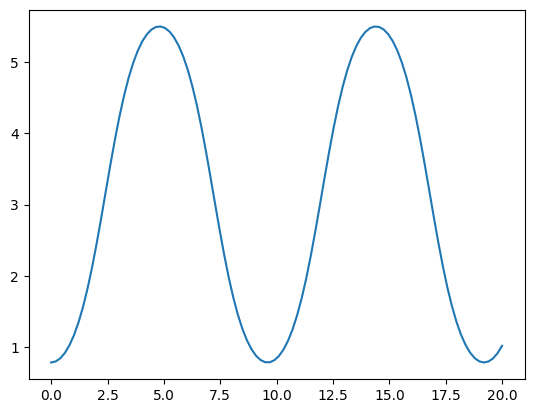

In [94]:
theta_sol,omega_sol=sol.T
plt.plot(t, theta_sol)
# plt.plot(t, omega_sol)

## 傅里叶变换

离散的傅里叶变换定义为

$$y[k] = \sum_{n=0}^{N-1} e^{-2 \pi i n (k / N)} x[n] $$

* $k/N$ 是一个无量纲的特定频率
* 如果知道给定的$x$时间间距，那么就可以计算频率 

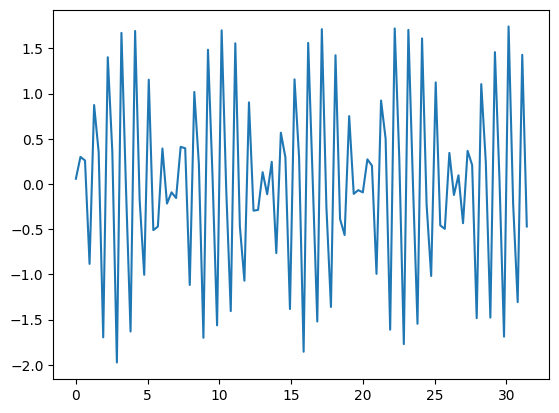

In [130]:
#时间
t = np.linspace(0, 10*np.pi, 100)
#频率
x = np.sin(2*np.pi*t) + np.sin(4*np.pi*t) + 0.1*np.random.randn(len(t))
#显示时域
plt.plot(t, x)

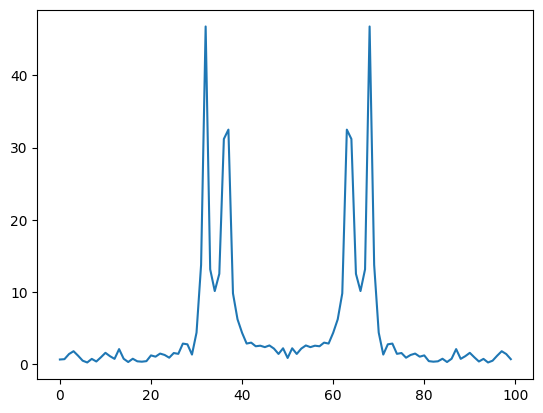

In [134]:
from scipy.fft import fft, fftfreq
#转到频域
xf = fft(x) 
#显示频域
plt.plot( np.abs(xf)) 
##这里出现了对称的图形,要对左侧负的部分处理

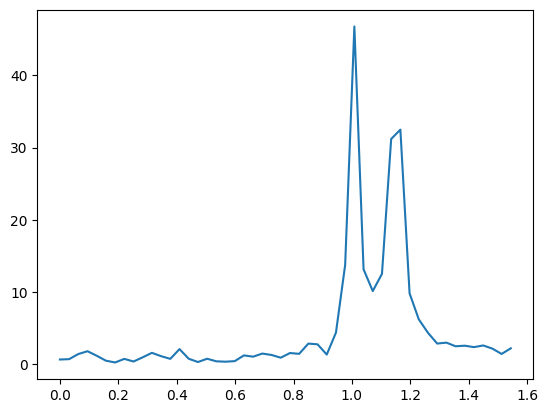

In [137]:
from scipy.fft import fft, fftfreq
N = len(x)
#用于取得半部 [:N//2]
xf = fft(x)[:N//2]
#np.diff(t)[0]为时间间隔 由于是常数所以直接采用第一个数字
tf = fftfreq(N, np.diff(t)[0])[:N//2]

plt.plot(tf, np.abs(xf))
plt.show()